In [1]:
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
trans_pairs = pd.read_csv('data/mt.translatedsentence_complete.csv')
trans_pairs.head()

,id,translatedSet,src,tgt
0,11492,Admin | Test Corpus Identity | Hindi -> English,"&quot; देखो बाला भैया , मुझे क्या मिला है , एक...",NaN
1,11491,Admin | Test Corpus Identity | Hindi -> English,&quot; प्रिया ने कहा,NaN
2,11490,Admin | Test Corpus Identity | Hindi -> English,"पमबरम नाम के लट्टू , के तो जैसे कान खड़े हो गये...",NaN
3,11489,Admin | Test Corpus Identity | Hindi -> English,अलमारी में सबसे नीचे पड़े - पड़े मैं बिलकुल उकता...,NaN
4,11488,Admin | Test Corpus Identity | Hindi -> English,&apos; बाला ने कपड़े से धूल में पड़े लट्टू को सा...,NaN


In [3]:
trans_pairs[trans_pairs['src'] == 'हैरान होकर मैंने अपने आसपास देखा']

,id,translatedSet,src,tgt
666,10826,Test User 301 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,NaN
1324,10168,Test User 801 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,I looked around with surprise .
1482,10010,Test User 1001 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,NaN
1736,9756,Test User 901 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1814,9640,Test User 701 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1855,9599,Test User 1101 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,Surprised I look around me .
2276,9104,Admin | Turtle Story MT L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,NaN
2629,8696,Test User 401 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprised, I looked around myself."
2880,8445,Test User | Turtle Story PE L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,"Astonished, I looked around myself."
3211,8110,Test User 601 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Suddenly i looked around myself


In [4]:
trans_pairs = trans_pairs.replace(np.nan, '', regex=True)
trans_pairs = trans_pairs[trans_pairs['translatedSet'].str.contains("Test User")]

In [5]:
def break_user(x):
    xs1 = x.split('|')
    
    if len(xs1) > 1:
        return xs1[0]
        
def breakdown_level(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-1]
    return ''

def breakdown_type(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-2]
    return ''

def breakdown_story(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return ' '.join(xs2[:-2])
    return ''

def breakdown_direction(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        return xs1[2].strip()

In [13]:
def story_sentence_merge(x):
    return pd.Series({'src': "%s" % ' '.join(x['src']).strip(),
                    'tgt': "%s" % ' '.join(x['tgt']).strip(), 
                  })

In [14]:
trans_stories = trans_pairs.groupby('translatedSet').apply(story_sentence_merge)
# len(trans_pairs)
# trans_pairs.head()
trans_stories.reset_index(level=0, inplace=True)
trans_stories.head()

,translatedSet,src,tgt
0,Test User 1001 | A Helping Hand PE L4 | Hindi ...,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","Some help dear whatever happens , you know who..."
1,Test User 1001 | All Aboard PE L2 | Hindi -> E...,मुझे पीला - पीला कुछ दिख रहा है अब मेरी बारी ह...,"I see something yellow Now it's my turn , said..."
2,Test User 1001 | At Least I'm Ok BL L3 | Hindi...,"खैर , हमें तो कोई दिक्कत नहीं है , जँगली बिल्ल...","Well, we don't have any problem, thought the w..."
3,Test User 1001 | Didi and Children | Hindi -> ...,एक बड़े शहर के किनारे कुछ बच्चे रहते थे उनके घर...,
4,Test User 1001 | How to be an Otter PE L3 | Hi...,"याद रखो , नदी हमेशा तुम्हारा घर रहेगी तुमको बह...","Remember , the river will always be your home ..."


In [19]:
# len(trans_stories)

In [20]:
trans_stories['user'] = trans_stories['translatedSet'].apply(lambda x: break_user(x))
trans_stories['type'] = trans_stories['translatedSet'].apply(lambda x: breakdown_type(x))
trans_stories['level'] = trans_stories['translatedSet'].apply(lambda x: breakdown_level(x))
trans_stories['story'] = trans_stories['translatedSet'].apply(lambda x: breakdown_story(x))
trans_stories['direction'] = trans_stories['translatedSet'].apply(lambda x: breakdown_direction(x))

In [21]:
trans_stories["spacy"] = trans_stories["tgt"].apply(lambda x: nlp(x))

In [23]:
for index, row in trans_stories.iterrows():
    src = row["src"]
    tgt = row["tgt"]
    if tgt == '':
        trans_stories.at[index,'score'] = 0.0
    else:
        spacy_main = row["spacy"]
        collect = trans_stories[trans_stories['src'] == src]
        simi = 0.0
        count = 0
        for ind, ro in collect.iterrows():
            if ro['tgt'] != '':
                simi += spacy_main.similarity(ro["spacy"])
                count += 1
        if count > 0:
            trans_stories.at[index,'score'] = (simi/count)
        else:
            trans_stories.at[index,'score'] = simi

In [26]:
del trans_stories["spacy"]

In [27]:
trans_stories['type'].replace('', np.nan, inplace=True)
trans_stories.dropna(subset=['type'], inplace=True)

In [48]:
# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Python implementation of BLEU and smooth-BLEU.
This module provides a Python implementation of BLEU and smooth-BLEU.
Smooth BLEU is computed following the method outlined in the paper:
Chin-Yew Lin, Franz Josef Och. ORANGE: a method for evaluating automatic
evaluation metrics for machine translation. COLING 2004.
"""

import collections
import math


def _get_ngrams(segment, max_order):
    """Extracts all n-grams upto a given maximum order from an input segment.
    Args:
        segment: text segment from which n-grams will be extracted.
        max_order: maximum length in tokens of the n-grams returned by this
            methods.
    Returns:
        The Counter containing all n-grams upto max_order in segment
        with a count of how many times each n-gram occurred.
    """
    ngram_counts = collections.Counter()
    for order in range(1, max_order + 1):
        for i in range(0, len(segment) - order + 1):
            ngram = tuple(segment[i:i+order])
            ngram_counts[ngram] += 1
    return ngram_counts


def compute_bleu(reference_corpus, translation_corpus, max_order=4, smooth=False):
    """Computes BLEU score of translated segments against one or more references.
    Args:
        reference_corpus: list of lists of references for each translation. Each
            reference should be tokenized into a list of tokens.
        translation_corpus: list of translations to score. Each translation
            should be tokenized into a list of tokens.
        max_order: Maximum n-gram order to use when computing BLEU score.
        smooth: Whether or not to apply Lin et al. 2004 smoothing.
    Returns:
        3-Tuple with the BLEU score, n-gram precisions, geometric mean of n-gram
        precisions and brevity penalty.
    """
    matches_by_order = [0] * max_order
    possible_matches_by_order = [0] * max_order
    reference_length = 0
    translation_length = 0
    for (references, translation) in zip(reference_corpus, translation_corpus):
        reference_length += min(len(r) for r in references)
        translation_length += len(translation)

        merged_ref_ngram_counts = collections.Counter()
        for reference in references:
            merged_ref_ngram_counts |= _get_ngrams(reference, max_order)
        translation_ngram_counts = _get_ngrams(translation, max_order)
        overlap = translation_ngram_counts & merged_ref_ngram_counts
        for ngram in overlap:
            matches_by_order[len(ngram)-1] += overlap[ngram]
        for order in range(1, max_order+1):
            possible_matches = len(translation) - order + 1
            if possible_matches > 0:
                possible_matches_by_order[order-1] += possible_matches

    precisions = [0] * max_order
    for i in range(0, max_order):
        if smooth:
            precisions[i] = ((matches_by_order[i] + 1.) / (possible_matches_by_order[i] + 1.))
        else:
            if possible_matches_by_order[i] > 0:
                precisions[i] = (float(matches_by_order[i]) / possible_matches_by_order[i])
            else:
                precisions[i] = 0.0

    if min(precisions) > 0:
        p_log_sum = sum((1. / max_order) * math.log(p) for p in precisions)
        geo_mean = math.exp(p_log_sum)
    else:
        geo_mean = 0

    ratio = float(translation_length) / reference_length

    if ratio > 1.0:
        bp = 1.
    else:
        bp = math.exp(1 - 1. / ratio)

    bleu = geo_mean * bp

    return (bleu, precisions, bp, ratio, translation_length, reference_length)

In [49]:
reference = [['Remember', ',', 'the', 'river', 'will', 'always', 'be', 'your', 'home', '.', 'You', 'have', 'to', 'learn', 'very', 'quickly', 'and', 'trust', 'your', 'understanding', '.', 'Maybe', 'your', 'favorite', 'sandy', 'beaches', 'will', 'disappear', ',', 'as', 'it', 'may', 'be', ',', 'they', 'may', 'reappear', 'in', 'rainy', 'season', 'the', "river's", 'life', 'changes', 'do', 'not', 'go', 'near', 'any', 'shining,', 'metal', 'object', 'or', 'try', 'to', 'touch', 'it', 'out', 'of', 'curiosity', 'stay', 'away', 'from', 'anything', 'that', 'does', 'not', 'live', 'in', 'the', 'river', '-', 'it', 'could', 'be', 'a', 'trap', 'to', 'catch', 'you', 'stay', 'away', 'from', 'them', 'and', 'they', 'will', 'stay', 'away', 'from', 'you', 'the', 'fishermen', 'also', 'need', 'fish', 'to', 'maintain', 'and', 'feed', 'their', 'family', 'the', 'fisherman', 'can', 'be', 'your', 'friend,', 'but', 'beware', 'of', 'his', 'net', '', "don't", 'disturb', 'them', 'evil', 'crocodiles', 'like', 'to', 'live', 'alone', 'there', 'will', 'be', 'large', 'herons,', 'shy', 'tortoises,', 'strange', 'looking', 'pelicans,', 'quiet', 'ducks', 'and', 'temperamental,', 'evil', 'crocodiles', 'in', 'the', 'water', 'with', 'you', '', 'there', 'will', 'be', 'other', 'living', 'beings', 'in', 'the', 'river,', 'you', 'will', 'have', 'to', 'learn', 'to', 'live', 'with', 'them', 'There', 'are', 'even', 'rocks', 'where', 'you', 'can', 'lie', 'down', 'to', 'take', 'naps.', 'There', 'is', 'sand', 'here', 'for', 'you', 'to', 'dig', 'and', 'lots', 'of', 'places', 'to', 'hide', 'The', 'river', 'is', 'also', 'a', 'place', 'for', 'you', 'to', 'play', '.', 'Listen', 'to', 'your', 'elders', ',', 'because', 'they', 'know', 'everything', 'about', 'the', 'river', 'the', 'adults', 'of', 'the', 'home', 'will', 'protect', 'the', 'kids', 'You', "'ll", 'also', 'protect', 'each', 'other', 'You', 'will', 'hunt', 'and', 'play', 'together', 'Like', 'a', 'family', ',', 'you', "'ll", 'live', 'in', 'a', 'group', 'Here', ',', 'on', 'the', 'banks', 'of', 'the', 'river', ',', 'you', 'will', 'dig', 'a', 'burrow', 'for', 'your', 'family', 'The', 'river', 'is', 'your', 'home', '.', 'But', 'remember', ',', 'never', 'eat', 'a', 'dead', 'fish', '.', 'It', "'s", 'not', 'easy', 'to', 'catch', 'all', 'kinds', 'of', 'fish', '.', 'there', 'are', 'some', 'which', 'even', 'have', 'whiskers', 'like', 'cat', 'you', 'will', 'also', 'see', 'fish', 'which', 'look', 'like', 'snake', 'You', "'ll", 'get', 'small', 'fish', 'and', 'big', 'fish', 'in', 'water', 'Slowly', ',', 'the', 'smell', 'of', 'fish', 'and', 'stinky', 'fishes', 'will', 'also', 'appeal', 'to', 'you.', "it's", 'important', 'to', 'know', 'about', 'fish', 'It', 'does', 'not', 'allow', 'water', 'to', 'go', 'in', 'so', 'you', 'feel', 'warm', 'even', 'when', 'you', 'swim', 'in', 'cold', 'water.', 'take', 'care', '', 'of', 'your', 'furry', 'skin', '.', 'your', 'webbed', 'feet', 'and', 'long', 'ore', 'like', 'tail', 'will', 'help', 'you', 'with', 'this', '.', 'So', 'you', 'can', 'catch', 'fish', 'and', 'avoid', 'any', 'danger', 'learn', 'to', 'swim', 'well', 'learn', 'to', 'Swim', 'Traits', 'to', 'become', 'an', 'Otter'], ['Remember', ',', 'the', 'river', 'will', 'always', 'be', 'your', 'home', '.', 'You', 'will', 'have', 'to', 'learn', 'everything', 'quickly', 'and', 'have', 'to', 'rely', 'on', 'your', 'understanding.', 'May', 'be', 'tomorrow', 'your', 'favourite', 'sand', 'beaches', 'disappear,', 'just', 'like', 'they', 'may', 'reappear', 'in', 'the', 'rainy', 'season.', 'Changes', 'happen', 'in', 'the', 'life', 'of', 'a', 'river.', 'Do', 'not', 'go', 'near', 'any', 'shining', 'metal', 'object', 'or', 'try', 'to', 'touch', 'it', 'curiously.', 'Stay', 'away', 'from', 'anything', 'that', 'does', 'not', 'live', 'in', 'the', 'river,', 'it', 'can', 'be', 'a', 'trap', 'to', 'catch', 'you.', '', 'Stay', 'away', 'from', 'them', 'and', 'then', 'they', 'will', 'stay', 'away', 'from', 'you.', 'Like', 'us,', 'fishermen', 'also', 'need', 'fish', 'for', 'the', 'maintenance', 'of', 'their', 'family.', '', 'The', 'fisherman', 'may', 'be', 'your', 'friend', 'but', 'stay', 'away', 'from', 'its', 'net.', 'Don', "'t", 'disturb', 'them..', 'Wicket', 'crocodiles', 'like', 'to', 'be', 'alone.', 'There', 'will', 'be', '', 'big', 'herons,', 'shy', 'turtles,', 'strange', 'looking', 'seals,', 'calm', 'ducks', 'and', 'wicked', 'crocodile', 'with', 'you', 'in', 'the', 'river.', '', 'There', 'will', 'be', 'more', 'beings', 'in', 'the', 'river', ',', 'you', 'must', 'learn', 'to', 'live', 'with', 'them', '.', 'There', 'are', 'also', 'rocks', 'on', 'which', 'you', 'can', 'take', 'nap.', 'Here', "'s", 'sand', 'for', 'you', 'to', 'dig', '', 'and', 'lots', 'of', 'places', 'to', 'hide.', 'The', 'river', 'is', 'your', 'playing', 'ground', 'as', 'well.', 'Listen', 'to', 'your', 'elders', ',', 'because', 'they', 'know', 'everything', 'about', 'the', 'river.', 'Elders', 'will', 'protect', 'the', 'children.', 'You', "'ll", 'also', 'protect', 'each', 'other.', 'You', "'will", 'hunt', 'and', 'play', 'together.', 'Like', 'a', 'family', ',', 'you', "'ll", 'stay', 'in', 'a', 'group.', 'Here', ',', 'on', 'the', 'banks', 'of', 'the', 'river', ',', 'you', 'will', 'dig', 'den', 'for', 'your', 'family.', 'The', 'river', 'is', 'your', 'home', '.', 'But', 'remember', ',', 'never', 'eat', 'a', 'dead', 'fish', '.', 'It', "'s", 'not', 'easy', 'to', 'catch', 'all', 'fishes', '.', 'There', 'will', 'even', 'be', 'some', 'which', 'have', 'whiskers', 'like', 'a', 'cat', '.', 'You', 'will', 'also', 'see', 'fishes', 'that', 'look', 'like', 'snake.', 'You', "'ll", 'find', 'small', 'and', 'big', 'fishes', 'in', 'water', '.', 'Slowly,', 'you', 'will', 'start', 'to', 'like', 'the', 'smell', 'of', 'fish', 'and', 'smelly', 'fishes', 'too.', 'It', 'is', 'necessary', 'to', 'know', 'about', 'fishes..', 'It', 'does', 'not', 'allow', 'water', 'to', 'get', 'inside,', 'so', 'that', 'you', 'feel', 'warm', 'even', 'when', 'swimming', 'in', 'cold', 'water.', '', 'Take', 'care', 'of', 'your', 'furry', 'skin.', 'For', 'this', 'your', 'webbed', 'feet', 'and', 'long', 'paddle', 'tail', 'will', 'help', 'you.', 'So', 'that', 'you', 'can', 'catch', 'fish', 'and', 'avoid', 'any', 'kind', 'of', 'danger..', 'Learn', 'to', 'swim', 'in', 'a', 'good', 'way.', 'Learn', 'swimming.', 'The', 'qualities', 'to', 'become', 'a', 'beaver.'], ['Remember,', 'the', 'river', 'will', 'always', 'be', 'your', 'home.', '', 'You', 'will', 'have', 'to', 'learn', 'these', 'very', 'fast', 'and', 'have', 'faith', 'in', 'your', 'wisdom.', '', 'It', 'is', '', 'possible', 'that', 'your', 'favourite', 'sandy', 'banks', 'disappear,', 'just', 'the', 'way', 'they', 'can', 'be', 'visible', 'again', 'in', 'the', 'rainy', 'season.', '', 'Changes', 'keep', 'on', 'happening', 'in', 'the', 'life', 'of', 'a', 'river.', '', "Don't", 'go', 'near', 'any', 'shining', 'metal', 'or', 'try', 'to', 'touch', 'it', 'out', 'of', 'curiosity.', '', 'Keep', 'away', 'from', 'anything', 'that', "doesn't", 'live', 'in', 'the', 'river,', 'it', 'may', 'be', 'a', 'trap', 'laid', 'for', 'you.', '', 'Keep', 'away', 'from', 'them', 'and', 'then', 'he', 'will', 'also', 'keep', 'way', 'from', 'you.', '', 'For', 'the', 'upkeep', 'of', 'their', 'family,', 'fishermen', 'too', 'need', 'fish', 'like', 'us.', '', 'The', 'fisherman', 'can', 'be', 'your', 'friend,', 'but', 'keep', 'away', 'from', 'his', 'net.', '', "Don't", 'disturb', 'them.', '', 'The', 'naughty', 'crocodiles', 'like', 'to', 'live', 'alone.', '', 'You', 'will', 'have', 'large', 'herons,', 'shy', 'tortoises,', 'strange-looking', 'pelicans,', 'quite', 'ducks', 'and', 'flamboyant', 'and', 'naughty', 'crocodiles', 'with', 'you', 'in', 'the', 'river.', '', 'There', 'will', 'be', 'other', 'living', 'beings', 'in', 'the', 'river,', 'you', 'will', 'have', 'to', 'learn', 'to', 'live', 'with', 'them.', '', 'There', 'are', 'also', 'boulders', 'on', 'which', 'you', 'can', 'have', 'a', 'nap.', '', 'Here', 'you', 'have', 'sand', 'for', 'digging,', 'many', 'places', 'to', 'hide.', '', 'The', 'river', 'is', 'also', 'your', 'playground.', '', 'Listen', 'to', 'your', 'elders,', 'because', 'they', 'know', 'everything', 'about', 'the', 'river.', '', 'The', 'elders', 'of', 'the', 'house', 'will', 'protect', 'the', 'children.', '', 'You', 'will', 'also', 'protect', 'each', 'other.', '', 'You', 'will', 'hunt', 'and', 'play', 'together.', '', 'You', 'will', 'live', 'like', 'a', 'family,', 'in', 'a', 'group.', '', 'Here,', 'on', 'the', 'bank', 'of', 'the', 'river,', 'you', 'will', 'dig', 'burrow', 'for', 'your', 'family.', '', 'The', 'river', 'is', 'your', 'house.', '', 'But', 'remember,', 'never', 'eat', 'a', 'dead', 'fish.', '', 'It', 'is', 'not', 'easy', 'to', 'catch', 'all', 'fish.', '', 'There', 'will', 'even', 'be', 'some', 'who', 'will', 'have', 'mustaches', 'like', 'cats.', '', 'You', 'will', 'also', 'see', 'such', 'fish', 'which', 'look', 'like', 'snakes.', 'You', 'will', 'find', 'big', 'and', 'small', 'fish', 'in', 'the', 'water.', '', 'By', 'and', 'by', 'you', 'will', 'start', 'liking', 'the', 'the', 'smell', 'of', 'fish', 'and', 'smelly', 'fish', 'too.', '', 'It', 'is', 'important', 'to', 'know', 'about', 'fish.', '', 'This', "doesn't", 'let', 'water', 'enter', 'inside', 'due', 'to', 'which', 'you', 'feel', 'warm', 'while', 'swimming', 'in', 'cold', 'water.', '', 'Take', 'care', 'of', 'your', 'furry', 'skin.', '', 'In', 'this', 'your', 'webbed', 'legs', 'and', 'long', 'oar', 'like', 'tail', 'will', 'help', 'you.', '', 'So', 'that', 'you', 'can', 'catch', 'fish', 'and', 'save', 'yourself', 'from', 'any', 'kind', 'of', 'danger.', '', 'Learn', 'to', 'swim', 'well.', '', 'Learn', 'to', 'swim.', 'The', 'qualities', 'of', 'being', 'an', 'otter.'], ['Remember,', 'the', 'river', 'will', 'always', 'be', 'your', 'home.', 'You', 'have', 'to', 'learn', 'everything', 'very', 'quickly', 'and', 'have', 'to', 'trust', 'in', 'your', 'understanding.', 'May', 'be', 'your', 'favorite', 'sandy', 'beaches', 'disappear', 'tomorrow,', 'just', 'as', 'they', 'may,', 'they',
'start', 'appearing', 'back', 'in', 'the', 'rainy', 'season.', 'The', 'life', 'of', 'the', 'river', 'changes', 'Do', 'not', 'go', 'near', 'any', 'flashing,', 'metal', 'object', 'or', 'do', 'not', 'try', 'to', 'touch', 'it', 'with', 'curiosity.', 'Stay', 'away', 'from', 'anything', 'that', 'does', 'not', 'live', 'in', 'the', 'river', '-', 'it', 'can', 'be', 'a', 'trap', 'laid', 'to', 'catch', 'you.', 'Stay', 'away', 'from', 'them', 'and', 'then', 'they', 'will', 'stay', 'away', 'from', 'you.', 'like', 'us,', 'to', 'maintain', 'their', 'family,', 'fishermen', '', 'also', 'need', 'fishes.', 'The', 'fisherman', 'may', 'be', 'your', 'friend,', 'but', 'stay', 'away', 'from', 'his', 'net.', "Don't", 'bother', 'them', 'Wicked', 'crocodiles', 'like', 'to', 'be', 'alone.', 'There', 'will', 'also', 'be', 'huge', 'herons,', 'shy', 'turtles,', 'strange-looking', 'pelican,', 'quiet', 'ducks', 'and', 'wicked', 'crocodiles', 'in', 'the', 'river', 'with', 'you.', 'There', 'will', 'be', 'other', 'animals', 'in', 'the', 'river,', 'you', 'will', 'have', 'to', 'learn', 'to', 'live', 'with', 'them.', 'There', 'are', 'also', 'rocks', 'on', 'which', 'you', 'can', 'take', 'a', 'nap.', 'There', 'is', 'sand', 'for', 'you', 'to', 'dig,', 'there', 'are', 'many', 'places', 'to', 'hide', 'The', 'river', 'is', 'also', 'your', 'playground.', 'Listen', 'to', 'your', 'elders,', 'because', 'they', 'know', 'everything', 'about', 'the', 'river.', '', 'the', 'elders', 'Will', 'protect', 'the', 'children', 'of', 'the', 'house.', 'You', 'will', 'also', 'protect', 'each', 'other.', 'You', 'will', 'hunt', 'together', 'and', 'play', 'Like', 'a', 'family,', "you'll", 'be', 'in', 'a', 'group', 'Right', 'here,', 'on', 'the', 'banks', 'of', 'the', 'river,', 'you', 'will', 'dig', 'the', 'den', 'for', 'your', 'family', 'The', 'river', 'is', 'your', 'home', 'But', 'remember,', 'never', 'eat', 'dead', 'fish', "It's", 'not', 'easy', 'to', 'catch', 'all', 'the', 'fish', 'There', 'will', 'even', 'be', 'some', 'who', 'have', 'mustaches', 'like', 'a', 'cat', 'You', 'will', 'also', 'see', 'fishes', 'that', 'look', 'like', 'snakes.', 'You', 'will', 'find', 'small', 'fish', 'and', 'big', 'fish', 'in', 'the', 'water', 'Gradually', 'you', 'will', 'like', 'the', 'smell', 'of', 'fish', 'and', 'smelly', 'fish', 'too.', 'मछलियों\xa0के\xa0बारे\xa0में\xa0जानना\xa0ज़रूरी\xa0है', 'It', 'does', 'not', 'allow', 'water', 'to', 'enter,', 'which', 'makes', 'you', 'feel', 'warm', 'even', 'when', 'swimming', 'in', 'cold', 'water.', 'Take', 'care', 'of', 'your', 'furry', 'skin', 'In', 'this,', 'your', 'webbed', 'feet', 'and', 'long', 'paddle', 'tail', 'will', 'help', 'you.', 'So', 'that', 'you', 'can', 'catch', 'fish', 'and', 'avoid', 'any', 'kind', 'of', 'danger.', 'Learn', 'to', 'swim', 'well', 'learn', 'swimming', 'Beaver', 'Behavior'], ['remember,', 'river', 'will', 'always', 'be', 'your', 'home', 'you', 'have', 'to', 'learn', 'everything', 'fast', 'and', 'have', 'to', 'trust', 'your', 'understanding', 'maybe', 'tomorrow,', 'your', 'favorite', 'sandy', 'beaches', 'disappear,', 'and', 'they', 'might', 'start', 'appearing', 'back', 'in', 'the', 'rainy', 'season', 'river', 'life', 'changes', 'never', 'go', 'near', 'the', 'shining', 'thing,', 'ornament', 'or', 'try', 'to', 'touch', 'it', 'with', 'curiosity', 'stay', 'away', 'from', 'such', 'things', 'which', 'are', 'not', 'present', 'in', 'the', 'river', '-', 'it', 'can', 'be', 'a', 'trap', 'to', 'catch', 'you', 'stay', 'away', 'from', 'them', 'and', 'they', 'also', 'stay', 'away', 'from', 'you', 'for', 'the', 'maintenance', 'of', 'the', 'family,', 'the', 'fishermen', 'like', 'us', 'also', 'need', 'fishes', '', 'the', 'fisherman', 'can', 'be', 'your', 'friend,', 'but', 'be', 'aware', 'from', 'his', 'trap', "don't", 'bother', 'them', 'wicked', 'crocodiles', 'would', 'like', 'to', 'live', 'alone', 'you', 'will', 'also', 'find', 'giant', 'heron,', 'shy', 'turtles,', 'different', 'pelican,', 'silent', 'ducks', 'and', 'wicked', 'crocodiles', 'in', 'the', 'river', 'some', 'more', 'creatures', 'will', 'be', 'present', 'in', 'the', 'river,', 'you', 'should', 'learn', 'to', 'live', 'with', 'them', 'you', 'can', 'relax', 'on', 'the', 'rocks', 'as', 'well', 'you', 'can', 'find', 'here', 'sand', 'to', 'dig', 'and', 'places', 'to', 'hide', 'as', 'well', 'river', 'is', 'your', 'playground', 'as', 'well', 'listen', 'to', 'your', 'elders,', 'because', 'they', 'know', 'everything', 'about', 'the', 'rivers', '', 'we', 'will', 'protect', 'elder', 'children', 'of', 'the', 'house', 'you', 'will', 'protect', 'each', 'other', 'as', 'well', 'you', 'will', 'hunt', 'together', 'and', 'play', 'you', 'will', 'stay', 'in', 'a', 'group', 'like', 'a', 'family', 'here,', 'on', 'the', 'bank', 'of', 'the', 'river,', 'you', 'will', 'dig', 'a', 'den', 'for', 'your', 'family', 'river', 'is', 'your', 'home', 'but', 'remember,', 'never', 'eat', 'the', 'died', 'fishes', "it's", 'not', 'easy', 'to', 'catch', 'all', 'fishes', 'you', 'will', 'find', 'some', 'fishes', 'which', 'have', 'mustache', 'like', 'cats', 'you', 'will', 'see', 'fishes', 'which', 'are', 'like', 'snake', 'you', 'will', 'find', 'big', 'and', 'small', 'fishes', 'in', 'water', 'Slowly,', 'you', 'would', 'like', 'the', 'odor', 'of', 'fish', 'and', 'smelly', 'fishes', 'as', 'well', 'it', 'is', 'important', 'to', 'know', 'about', 'the', 'fishes', 'it', "doesn't", 'allow', 'water', 'inside', 'for', 'which', 'you', 'feel', 'heat', 'even', 'in', 'the', 'cool', 'water', 'while', 'swimming', '', 'take', 'care', 'of', 'your', 'fluffy', 'skin', 'in', 'this,', 'your', 'webbed', 'feet', 'and', 'long', 'padded', 'tail', 'will', 'help', 'you', 'like', 'catching', 'fish', 'and', 'escape', 'from', 'any', 'kind', 'of', 'danger', 'learn', 'to', 'swim', 'with', 'good', 'techniques', 'learn', 'to', 'swim', 'qualities', 'of', 'a', 'beaver'], ['Remember', ',', 'the', 'river', 'will', 'always', 'be', 'your', 'home', '.', 'You', 'have', 'to', 'learn', 'very', 'quickly', 'and', 'rely', 'on', 'your', 'understanding', '.', 'Your', 'favorite', 'sandy', 'beach', 'may', 'disappear', 'tomorrow', 'but', 'similarly', 'you', 'will', 'see', 'it', 'again', 'when', 'it', 'rains', '.', 'Changes', 'are', 'a', 'way', 'of', 'life', 'in', 'the', 'river', '.', 'Don', "'t", 'try', 'to', 'go', 'near', 'any', 'shining', ',', 'metal', 'object', 'or', 'touch', 'it', '.', 'Keep', 'away', 'from', 'anything', 'that', 'does', 'not', 'belong', 'to', 'the', 'river', ',', 'it', 'can', 'be', 'a', 'trap', 'to', 'catch', 'you', '.', 'Keep', 'away', 'from', 'them', 'and', 'they', 'will', 'stay', 'away', 'from', 'you', '.', 'Like', 'us,', 'even', 'the', 'fishermen', 'need', 'fish', 'to', 'feed', 'their', 'family', '.', 'The', 'fisherman', 'may', 'be', 'a', 'friend,', 'but', 'stay', 'away', 'from', 'his', 'net', '.', 'Don', "'t", 'bother', 'them', '.', 'The', 'wicked', 'crocodile', 'like', 'to', 'live', 'alone', '.', 'There', 'will', 'be', 'the', 'great', 'herons,', 'shy', 'turtles,', 'odd', 'looking', 'pelicans,', 'peaceful', 'ducks', 'and', 'the', 'naughty', 'crooked', 'crocodile', '.', 'You', 'must', 'learn', 'to', 'live', 'with', 'other', 'animals', 'in', 'the', 'river', '', '.', 'There', 'are', 'rocks', 'on', 'which', 'you', 'can', 'take', 'a', 'nap', '.', 'There', "'s", 'sand', 'for', 'you', 'to', 'dig,', 'and', 'lots', 'of', 'places', 'to', 'hide', '.', 'The', 'river', 'is', 'also', 'your', 'play', 'ground', '.', 'Listen', 'to', 'your', 'elders', ',', 'because', 'they', 'know', 'everything', 'about', 'the', 'river', '.', 'They', 'elders', 'will', 'protect', 'children', 'of', 'the', 'family', '.', 'You', "'ll", 'also', 'protect', 'each', 'other', '.', 'You', 'will', 'hunt', 'and', 'play', 'together', '.', 'Like', 'a', 'family', ',', 'you', "'ll", 'live', 'in', 'a', 'group.', 'Here', ',', 'on', 'the', 'banks', 'of', 'the', 'river', ',', 'you', 'can', 'dig', 'burrows', '', 'for', 'your', 'family', '.', 'The', 'river', 'is', 'your', 'home', '.', '', 'But', 'remember', ',', 'never', 'eat', 'a', 'dead', 'fish', '.', 'It', "'s", 'not', 'easy', 'to', 'catch', 'all', 'fish', '.', '', 'There', 'will', 'be', 'some', 'who', 'have', 'whiskers', 'like', 'cats', '.', 'You', 'will', 'even', 'see', 'fish', 'which', 'look', 'like', 'snakes', '.', 'You', "'ll", 'get', 'many', 'big', 'and', 'small', 'fish', 'in', 'the', 'water', '.', 'Slowly', ',', 'you', 'will', 'like', 'the', 'smell', 'of', 'fish', 'and', 'even', 'the', 'pungent', 'smelling', 'ones', '.', 'You', 'should', 'know', 'about', 'the', 'fish', '.', 'It', 'does', 'not', 'allow', 'water', 'to', 'seep', 'in', 'to', 'the', 'skin', ',', 'so', 'it', 'keeps', 'you', 'warm', 'even', 'when', 'you', 'take', 'a', 'swim', 'in', 'cold', 'water', '.', 'Take', 'care', 'of', 'your', 'fur', '.', 'Your', 'webbed', 'paws', 'and', 'long', 'curvy', 'tail', 'will', 'help', 'you', 'in', 'this', '.', 'So', 'that', 'you', 'can', 'catch', 'fish', 'and', 'avoid', 'any', 'danger', 'too.', 'Swim', 'in', 'good', 'way.', 'Learn', 'to', 'swim', '.', 'How', 'to', 'be', 'an', 'Otter?'], ['Remember,', 'the', 'river', 'will', 'always', 'be', 'your', 'home', '', 'You', 'have', 'to', 'learn', 'everything', 'very', 'quickly', 'and', 'have', 'faith', 'on', 'your', 'understanding', '', "It's", 'possible', 'that', 'your', 'favourite', 'sandy', 'beach', 'will', 'disappear', 'someday,', 'as', 'it', 'may', 'be', ',', "they'll", 'come', 'back', 'in', 'the', 'rainy', 'season', 'Changes', 'in', 'the', 'life', 'of', 'the', 'river', 'are', 'common', "Don't", 'go', 'near', 'to', 'a', 'shining,', 'metal', 'object', 'and', "don't", 'try', 'to', 'touch', 'it', 'with', 'curiosity', '', 'Keep', 'away', 'from', 'any', 'of', 'the', 'things', 'that', 'does', 'not', 'belong', 'to', 'the', 'river', ',', 'it', 'can', 'be', 'a', 'network', 'to', 'catch', 'you', '', 'Stay', 'away', 'from', 'them,', 'and', 'they', 'will', 'be', 'away', 'from', 'you', 'Just', 'like', 'us,', 'the', 'fishermen', 'also', 'need', 'fish,', 'for', 'the', 'maintenance', 'of', 'their', 'family', '', 'You', 'may', 
'be', 'friends', 'with', 'the', 'fishermen,', 'but', 'beware', 'of', 'his', 'net', "Don't", 'trouble', 'them', 'The', 'wicked', 'crocodiles', 'like', 'to', 'live', 'alone', '', 'With', 'you,', 'there', 'will', 'be', 'giant', 'cranes,', 'some', 'shy', 'turtles,', 'weird', 'looking', 'pelicans,', 'some', 'quite', 'ducks', 'and', 'some', 'mischievous,', 'cunning', 'crocodiles', 'in', 'the', 'river', '', 'There', 'will', 'be', 'more', 'animals', 'in', 'the', 'river,', 'you', 'must', 'learn', 'to', 'live', 'with', 'them', '', 'There', 'are', 'rocks', 'on', 'which', 'you', 'can', 'sleep', '', "There's", 'sand', 'for', 'you', 'to', 'dig', 'here', ',', 'and', "there's", 'a', 'lot', 'of', 'hiding', 'places', 'for', 'you', 'The', 'river', 'is', 'also', 'the', 'playground', 'for', 'your', 'game', '', 'Listen', 'to', 'your', 'elders,', 'because', 'they', 'know', 'everything', 'about', 'the', 'river', 'The', 'elders', 'will', 'protect', 'the', '', 'children', 'of', 'the', 'group', '', "You'll", 'also', 'protect', 'each', 'other', "You're", 'going', 'to', 'hunt', 'and', 'play', 'together', "You'll", 'be', 'in', 'a', 'group,', 'like', 'a', 'family', 'Here,', 'on', 'the', 'banks', 'of', 'the', 'river,', 'you', 'will', 'make', 'a', 'burrow', 'for', 'your', 'family', 'The', 'river', 'is', 'your', 'home', '', 'But', 'remember,', 'never', 'eat', 'a', 'dead', 'fish', '', "It's", 'not', 'easy', 'to', 'catch', 'all', 'fishes', 'Infact,', 'some', 'will', 'have', 'moustache', 'like', 'a', 'cat', 'as', 'well', '', "You'll", 'see', 'fishes', 'that', 'look', 'like', 'snake', '', "You'll", 'get', 'small', 'and', 'big', 'fishes', 'in', 'water', 'Gradually,', 'you', 'will', 'start', 'liking', 'the', 'smell', 'of', 'fish', 'and', '', 'smelly', 'fishes', 'too', "It's", 'important', 'to', 'know', 'about', 'fishes', 'It', 'does', 'not', 'allow', 'water', 'to', 'go', 'into', 'the', 'skin,', 'becaue', 'of', 'which', 'even', 'when', 'you', 'swim', 'in', 'cold', 'water', 'you', 'feel', 'warm', 'Take', 'care', 'of', 'your', 'furry', 'skin', 'Your', 'webbed', 'feet', 'and', 'long', 'paddle', 'tail', 'will', 'help', 'you', 'in', 'this', 'Such', 'that', 'you', 'can', 'catch', 'a', 'fish', 'and', 'avoid', 'any', 'danger', 'Learn', 'to', 'swim', 'in', 'good', 'way', 'Learn', 'to', 'swim', 'The', 'quality', 'of', 'being', 'a', 'beaver'], ['Remember,', 'the', 'river', 'is', 'always', 'your', 'home.', 'You', 'will', 'have', 'to', 'learn', 'everything', 'quickly', 'and', 'trust', 'your', 'senses.', 'It', 'can', 'happen', 'that', 'tomorrow', 'your', 'favorite', 'sandy', 'shores', 'disappear', 'and', 'just', 'like', 'that', 'it', 'can', 'happen', 'that', 'they', 'appear', 'again', 'during', 'the', 'monsoons.', '', 'The', 'life', 'in', 'river', 'keeps', 'on', 'changing.', 'Do', 'not', 'go', 'near', 'any', 'shiny', 'metal', 'object', 'or', 'do', 'not', 'try', 'to', 'touch', 'it', 'out', 'of', 'curiosity.', 'Stay', 'away', 'from', 'things', 'that', 'do', 'not', 'belong', 'to', 'the', 'river-', 'it', 'can', 'be', 'a', 'bait', 'meant', 'to', 'catch', 'you.', 'Stay', 'away', 'from', 'them', 'and', 'they', 'will', 'stay', 'away', 'from', 'you.', 'Like', 'us,', 'even', 'the', 'fishermen', 'need', 'fish', 'for', 'the', 'sustenance', 'of', 'their', 'families.', 'The', 'fishermen', 'can', 'be', 'your', 'friends', 'but', 'steer', 'clear', 'of', 'their', 'nets.', 'Do', 'not', 'bother', 'them.', 'The', 'evil', 'crocodiles', 'like', 'to', 'live', 'alone.', 'Along', 'with', 'you,', 'there', 'will', 'be', 'huge', 'herons,', 'shy', 'turtles,', 'weird', 'looking', 'pelicans,', 'quiet', 'ducks', 'and', 'temperamental', 'evil', 'crocodiles.', '', 'There', 'will', 'be', 'other', 'organisms', 'in', 'the', 'river', 'and', 'you', 'will', 'have', 'to', 'live', 'alongside', 'them.', 'There', 'are', 'rocks', 'as', 'well', 'on', 'which', 'you', 'can', 'lie', 'down', 'and', 'take', 'a', 'nap.', 'There', 'is', 'sand', 'for', 'you', 'to', 'dig', 'and', 'there', 'are', 'lots', 'of', 'places', 'to', 'hide.', 'The', 'river', 'is', 'your', 'playground', 'as', 'well.', 'Listen', 'to', 'your', 'elders', 'because', 'they', 'know', 'everything', 'about', 'the', 'river.', 'The', 'elders', 'in', 'the', 'family', 'will', 'protect', 'the', 'younger', 'ones.', 'You', 'will', 'protect', 'each', 'other', 'as', 'well.', 'You', 'will', 'hunt', 'together', 'and', 'play', 'together.', 'Like', 'a', 'family,', 'you', 'will', 'live', 'in', 'a', 'community.', 'This', 'is', 'where,', 'on', 'the', 'shore', 'of', 'the', 'river,', 'you', 'will', 'dig', 'a', 'den', 'for', 'your', 'family.', 'River', 'is', 'your', 'home.', 'But', 'remember,', 'never', 'eat', 'a', 'dead', 'fish.', "It's", 'not', 'easy', 'to', 'catch', 'all', 'kinds', 'of', 'fish.', 'There', 'will', 'even', 'be', 'a', 'few', 'which', 'have', 'whiskers', 'like', 'a', 'cat.', 'You', 'will', 'even', 'see', 'fish', 'that', 'look', 'like', 'a', 'snake.', 'You', 'will', 'find', 'both', 'small', 'and', 'large', 'fish', 'in', 'the', 'water.', 'Slowly', 'you', 'will', 'start', 'liking', 'the', 'smell', 'of', 'fish', 'and', 'stinky', 'fish.', 'It', 'necessary', 'to', 'have', 'good', 'knowledge', 'of', 'fish.', 'It', "doesn't", 'let', 'water', 'enter,', 'because', 'of', 'which', 'even', 'while', 'swimming', 'in', 'cold', 'water,', 'you', 'keep', 'warm.', 'Take', 'care', 'of', 'your', 'furry', 'skin.', 'Your', 'webbed', 'and', 'long', 'paddle', 'like', 'tail', 'will', 'help', 'you', 'with', 'this.', 'So', 'that', 'you', 'can', 'catch', 'fish', 'and', 'save', 'yourself', 'from', 'any', 'danger.', 'Learn', 'swimming', 'very', 'well.', 'Learn', 'swimming.', 'How', 'to', 'be', 'an', 'otter.']]
test = ['Remember', ',', 'the', 'river', 'will', 'always', 'be', 'your', 'home', '.', 'You', 'have', 'to', 'learn', 'very', 'quickly', 'and', 'trust', 'your', 'understanding', '.', 'Maybe', 'your', 'favorite', 'sandy', 'beaches', 'will', 'disappear', ',', 'as', 'it', 'may', 'be', ',', 'they', 'may', 'reappear', 'in', 'rainy', 'season', 'the', "river's", 'life', 'changes', 'do', 'not', 'go', 'near', 'any', 'shining,', 'metal', 'object', 'or', 'try', 'to', 'touch', 'it', 'out', 'of', 'curiosity', 'stay', 'away', 'from', 'anything', 'that', 'does', 'not', 'live', 'in', 'the', 'river', '-', 'it', 'could', 'be', 'a', 'trap', 'to', 'catch', 'you', 'stay', 'away', 'from', 'them', 'and', 'they', 'will', 'stay', 'away', 'from', 'you', 'the', 'fishermen', 'also', 'need', 'fish', 'to', 'maintain', 'and', 'feed', 'their', 'family', 'the', 'fisherman', 'can', 'be', 'your', 'friend,', 'but', 'beware', 'of', 'his', 'net', '', "don't", 'disturb', 'them', 'evil', 'crocodiles', 'like', 'to', 'live', 'alone', 'there', 'will', 'be', 'large', 'herons,', 'shy', 'tortoises,', 'strange', 'looking', 'pelicans,', 'quiet', 'ducks', 'and', 'temperamental,', 'evil', 'crocodiles', 'in', 'the', 'water', 'with', 'you', '', 'there', 'will', 'be', 'other', 'living', 'beings', 'in', 'the', 'river,', 'you', 'will', 'have', 'to', 'learn', 'to', 'live', 'with', 'them', 'There', 'are', 'even', 'rocks', 'where', 'you', 'can', 'lie', 'down', 'to', 'take', 'naps.', 'There', 'is', 'sand', 'here', 'for', 'you', 'to', 'dig', 'and', 'lots', 'of', 'places', 'to', 'hide', 'The', 'river', 'is', 'also', 'a', 'place', 'for', 'you', 'to', 'play', '.', 'Listen', 'to', 'your', 'elders', ',', 'because', 'they', 'know', 'everything', 'about', 'the', 'river', 'the', 'adults', 'of', 'the', 'home', 'will', 'protect', 'the', 'kids', 'You', "'ll", 'also', 'protect', 'each', 'other', 'You', 'will', 'hunt', 'and', 'play', 'together', 'Like', 'a', 'family', ',', 'you', "'ll", 'live', 'in', 'a', 'group', 'Here', ',', 'on', 'the', 'banks', 'of', 'the', 'river', ',', 'you', 'will', 'dig', 'a', 'burrow', 'for', 'your', 'family', 'The', 'river', 'is', 'your', 'home', '.', 'But', 'remember', ',', 'never', 'eat', 'a', 'dead', 'fish', '.', 'It', "'s", 'not', 'easy', 'to', 'catch', 'all', 'kinds', 'of', 'fish', '.', 'there', 'are', 'some', 'which', 'even', 'have', 'whiskers', 'like', 'cat', 'you', 'will', 'also', 'see', 'fish', 'which', 'look', 'like', 'snake', 'You', "'ll", 'get', 'small', 'fish', 'and', 'big', 'fish', 'in', 'water', 'Slowly', ',', 'the', 'smell', 'of', 'fish', 'and', 'stinky', 'fishes', 'will', 'also', 'appeal', 'to', 'you.', "it's", 'important', 'to', 'know', 'about', 'fish', 'It', 'does', 'not', 'allow', 'water', 'to', 'go', 'in', 'so', 'you', 'feel', 'warm', 'even', 'when', 'you', 'swim', 'in', 'cold', 'water.', 'take', 'care', '', 'of', 'your', 'furry', 'skin', '.', 'your', 'webbed', 'feet', 'and', 'long', 'ore', 'like', 'tail', 'will', 'help', 'you', 'with', 'this', '.', 'So', 'you', 'can', 'catch', 'fish', 'and', 'avoid', 'any', 'danger', 'learn', 'to', 'swim', 'well', 'learn', 'to', 'Swim', 'Traits', 'to', 'become', 'an', 'Otter']

compute_bleu([list(filter(None, lst)) for lst in reference], test, max_order=1)[0]

1.0

In [31]:
trans_stories.fillna('', inplace=True)
trans_stories = trans_stories[trans_stories['direction'] == 'Hindi -> English']

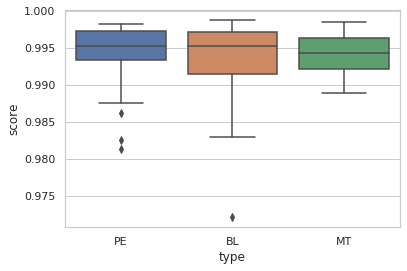

In [72]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x="type", y="score", data=trans_stories[trans_stories['tgt'] != ''])

In [50]:
for j in range(1,5):
    for index, row in trans_stories.iterrows():
        src = row["src"]
        tgt = row["tgt"]
        collect = trans_stories[trans_stories['src'] == src]
        refs = []
        if row["tgt"] != '':
            for ind, ro in collect.iterrows():
                if ro["tgt"] != '':
                    refs.append(ro["tgt"].strip().split(" "))
#             print('\n\n')
#             print(refs, tgt.split(" "))
            trans_stories.at[index,'bleu-' + str(j)] = compute_bleu([list(filter(None, lst)) for lst in refs], tgt.split(" "), max_order=j, smooth=False)[0]
        else:
            trans_stories.at[index,'bleu-' + str(j)] = 0.0

[(0.97, 1.0)]

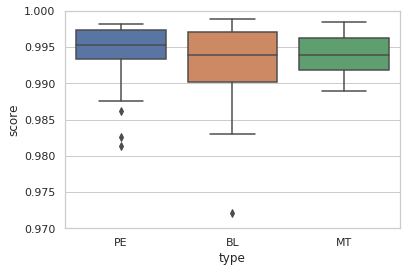

In [81]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="type", y="score", data=trans_stories)
ax.set(ylim=(0.970,1.0))

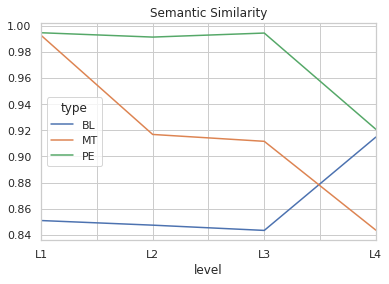

In [64]:
trans_stories.groupby(['level','type']).mean()["score"].unstack().plot(title="Semantic Similarity")

In [69]:
nonblankdf = trans_stories[trans_stories['tgt'] != ''].groupby(['type']).count()
totaldf = trans_stories.groupby(['type']).count()
nonblankdf.divide(totaldf)

,translatedSet,src,tgt,user,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
type,,,,,,,,,,,,
BL,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925,0.867925
MT,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569,0.921569
PE,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392


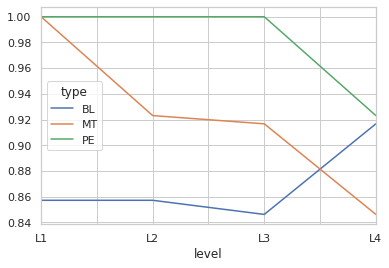

In [68]:
nonblankdf.divide(totaldf)["story"].unstack().plot()

In [82]:
trans_stories.to_csv('./data/story_quality.csv')